<a href="https://colab.research.google.com/github/ttuyetdinh/diveintocode-ml/blob/master/Week%204/Assign14_Predict_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

In [61]:
url='https://raw.githubusercontent.com/ttuyetdinh/diveintocode-ml/master/Week%204/train.csv'
dataset=pd.read_csv(url)
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [62]:
dataset_select=dataset.loc[:, ['GrLivArea', 'YearBuilt', 'SalePrice'] ]
x = dataset_select.loc[:, ['GrLivArea', 'YearBuilt'] ]
y = dataset_select.loc[:, 'SalePrice']
dataset_select.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


#Problem 2

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=42, shuffle=True) 
#Pre-processing
scaler = StandardScaler()
X_train_fit = scaler.fit(X_train)
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)
#Predict the value
reg = LinearRegression()
reg.fit(X_train_trans, y_train)
y_pred_reg = np.round(reg.predict(X_test_trans),2)
print('Real prices: {}' .format(np.array(y_test)[:5]))
print('Predict prices: {}' .format(y_pred_reg[:5]))


Real prices: [154500 325000 115000 159000 315500]
Predict prices: [130445.81 306448.48  88741.83 168496.13 227800.18]


In [65]:
#Evaluate
mse = mean_squared_error(y_test, y_pred_reg)
score=reg.score(X_test_trans, y_test)
print('Mean square error: {}' .format(mse))
print('Variance (R^2): {}' .format(score))
print('Coefficients: ', reg.coef_) 

Mean square error: 2314465088.5703096
Variance (R^2): 0.6696127072424974
Coefficients:  [48581.24689919 32305.10745427]


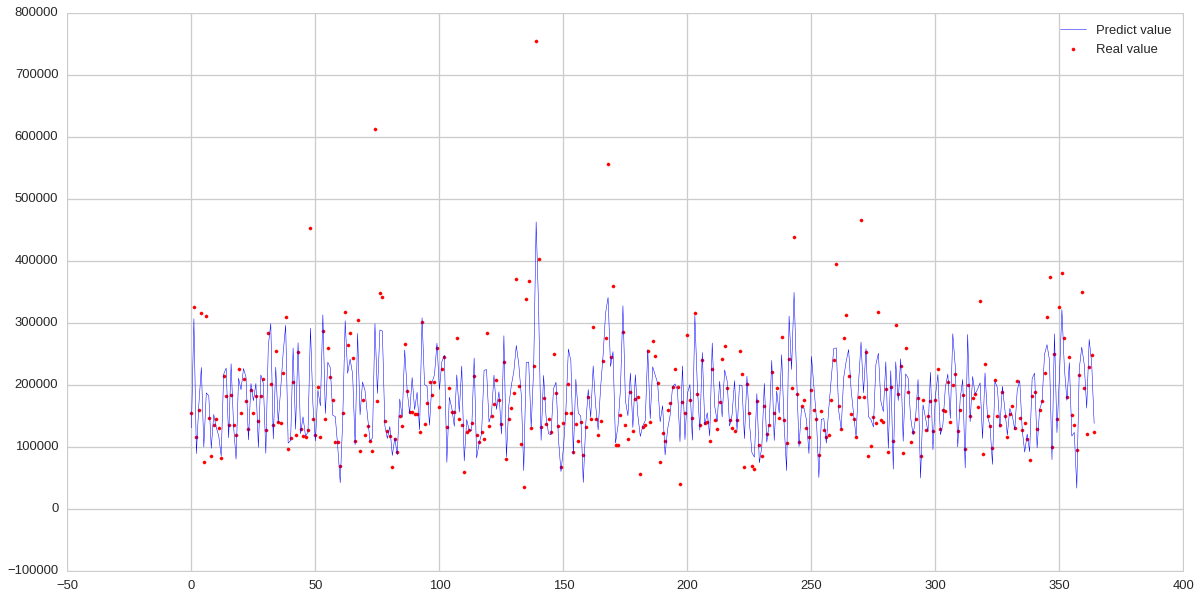

In [72]:
#Visualization
plt.style.use('seaborn-whitegrid') 
plt.figure(figsize=(20,10))
plt.scatter(np.arange(len(y_test)) ,y_test, color = "red", s = 10, label = 'Real value') 
plt.plot(np.arange(len(y_pred_reg)) ,y_pred_reg, color = "blue", label = 'Predict value', linewidth=0.5) 
plt.legend()
plt.show()

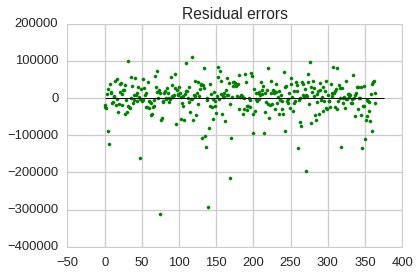

In [98]:
plt.scatter(np.arange(len(y_test)), y_pred_reg - y_test, color = "green", s = 10) 
plt.hlines(y = 0, xmin = 0, xmax = len(y_test) + 10, linewidth = 1) 
plt.title("Residual errors") 
plt.show()

REG
Real prices: [154500 325000 115000 159000 315500]
Predict prices: [130445.81 306448.48  88741.83 168496.13 227800.18]
Mean square error: 2314465088.5703096
Coefficient R^2: 0.6696127072424974


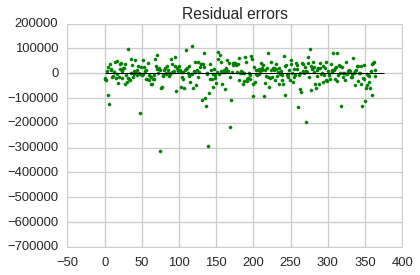

SVR
Real prices: [154500 325000 115000 159000 315500]
Predict prices: [164844.89 165181.29 164836.2  164959.55 165274.51]
Mean square error: 7169223063.292623
Coefficient R^2: -0.023398540202243634


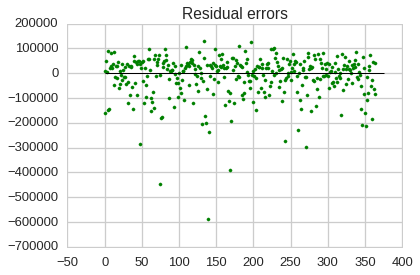

TREE
Real prices: [154500 325000 115000 159000 315500]
Predict prices: [132000. 336000. 102000. 160000. 256300.]
Mean square error: 2290208421.883714
Coefficient R^2: 0.6730753198386521


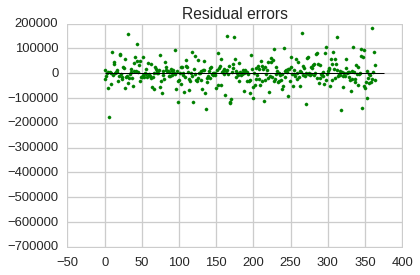

FOREST
Real prices: [154500 325000 115000 159000 315500]
Predict prices: [142415.   322956.68  98463.5  156407.   251114.03]
Mean square error: 1640635106.3287659
Coefficient R^2: 0.765801180227128


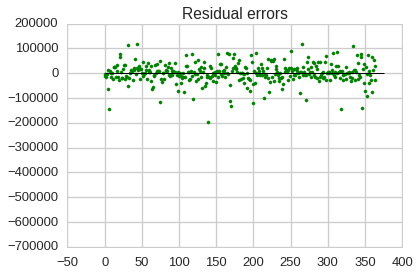

In [100]:
svr = SVR()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()
model = [reg, svr, tree ,forest]
model_name = ['REG', 'SVR', 'TREE', 'FOREST']
def calculate(X , y, model, model_name):
  y_pre = np.round(model.predict(X),2)
  print('Real prices: {}' .format(np.array(y)[:5]))
  print('Predict prices: {}' .format(y_pre[:5]))
  mse = mean_squared_error(y, y_pre)
  score=model.score(X, y)
  print('Mean square error: {}' .format(mse))
  print('Coefficient R^2: {}' .format(score))
  visualize(y_pre, y_test)
def visualize(y_pre, y_test):
  plt.ylim(-700000,200000)
  plt.scatter(np.arange(len(y_pre)), y_pre - y_test, color = "green", s = 10) 
  plt.hlines(y = 0, xmin = 0, xmax = len(y_pre) + 10 , linewidth = 1)   
  plt.title("Residual errors") 
  plt.show()
for model,model_name in zip(model, model_name):
  print(model_name)
  model.fit(X_train_trans, y_train)
  calculate(X_test_trans, y_test, model, model_name)

According to the above evaluation, we can conclude that the RandomForestRegession model give us the best predictdion about house prices